### Задание:
1. Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
    - масштабирование признаков (не менее чем тремя способами);
    - обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
    - обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
    - отбор признаков:
        - один метод из группы методов фильтрации (filter methods);
        - один метод из группы методов обертывания (wrapper methods);
        - один метод из группы методов вложений (embedded methods).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso
! pip install mlxtend

In [2]:
data_loaded = pd.read_csv('data/water_potability.csv')
data = data_loaded

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
[(c, round(data[c].isnull().mean() * 100, 4)) for c in data.columns if data[c].isna().sum() > 0]

[('ph', 14.9878), ('Sulfate', 23.84), ('Trihalomethanes', 4.9451)]

In [5]:
# Удаление столбца 'Sulfate'
data.drop(columns=['Sulfate'], inplace=True)

In [6]:
# Заполним пропуски в 'ph' и 'Trihalomethanes' их медианными значениями, так как оно менее чувствительно к выбросам по сравнению со средним значением
data['ph'].fillna(data['ph'].median(), inplace=True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].median(), inplace=True)

In [7]:
data.rename(columns={'Potability': 'Y'}, inplace=True)
hdata = data.drop('Y', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(hdata, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)

In [9]:
hdata.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075


### i. Масштабирование признаков

In [10]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=hdata.columns)
    return res

#### Масштабирование данных на основе Z-оценки

In [11]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(hdata)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.343939,-0.824357,-2.182297,0.138786
...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,1.240155,-0.118075,0.017772,0.601124
3272,0.499833,-0.085667,-0.534295,0.593290,-0.417706,1.698560,0.013636,-1.497627
3273,1.595654,-0.626829,1.270810,0.144017,0.072263,-0.981329,0.218038,-0.856007
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.288597,-0.942064,0.702756,0.950797


In [12]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


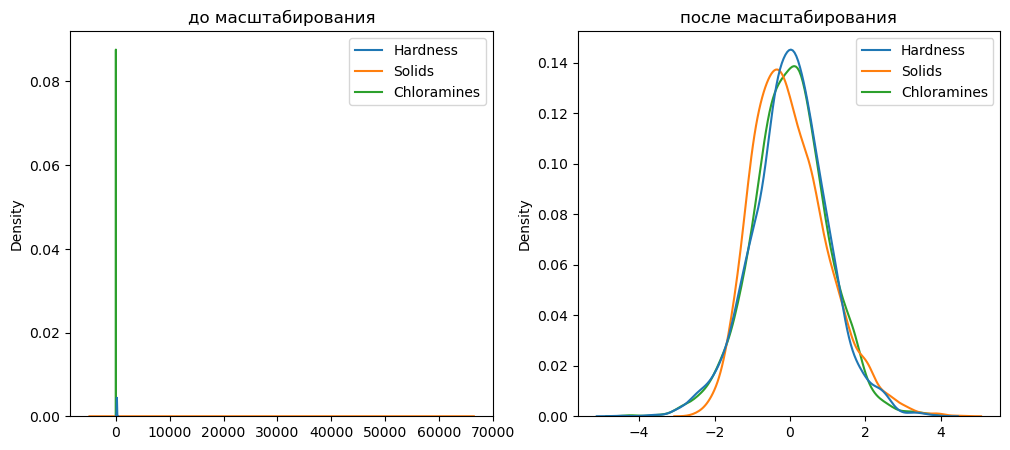

In [13]:
draw_kde(['Hardness', 'Solids', 'Chloramines'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [14]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [15]:
data_cs12_scaled_train.describe()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2.620000e+03,2.620000e+03,2.620000e+03,2.620000e+03,2.620000e+03,2.620000e+03,2.620000e+03,2.620000e+03
mean,-7.024068e-16,-2.840815e-16,9.898782e-17,-1.098358e-16,-2.888275e-16,2.603515e-16,1.155310e-15,-4.067993e-16
std,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00,1.000191e+00
min,-4.750826e+00,-4.519828e+00,-2.457715e+00,-4.316782e+00,-2.990467e+00,-3.668806e+00,-4.211567e+00,-3.251810e+00
25%,-5.442659e-01,-5.979077e-01,-7.229464e-01,-6.401998e-01,-7.432260e-01,-6.587094e-01,-6.091430e-01,-6.803889e-01
50%,-3.022442e-02,1.962099e-02,-1.272354e-01,-1.002392e-02,-6.131001e-02,-1.810365e-02,9.201991e-03,-9.828617e-03
75%,5.302951e-01,6.258017e-01,6.171044e-01,6.281554e-01,6.805755e-01,7.005465e-01,6.394704e-01,6.902986e-01
max,4.641067e+00,3.896115e+00,4.481084e+00,3.773394e+00,4.016473e+00,4.242295e+00,3.684987e+00,3.583477e+00


In [16]:
data_cs12_scaled_test.describe()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,-0.025503,0.133482,0.068399,-0.005914,0.040368,-0.028779,-0.022832,0.003903
std,0.928542,1.011373,0.992940,1.044745,0.949984,1.013240,1.050164,1.041967
min,-2.507110,-3.070517,-2.340261,-3.654571,-2.637149,-2.830150,-3.735073,-2.705694
25%,-0.497805,-0.466992,-0.682096,-0.615724,-0.673208,-0.719548,-0.711435,-0.678101
50%,-0.030224,0.116298,-0.050208,0.084890,0.025833,-0.045522,0.009202,-0.033903
75%,0.504653,0.783516,0.632937,0.647137,0.718686,0.606295,0.707167,0.688673
max,3.006320,3.719492,3.941244,3.826424,2.781317,3.850289,3.046594,3.267172


/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


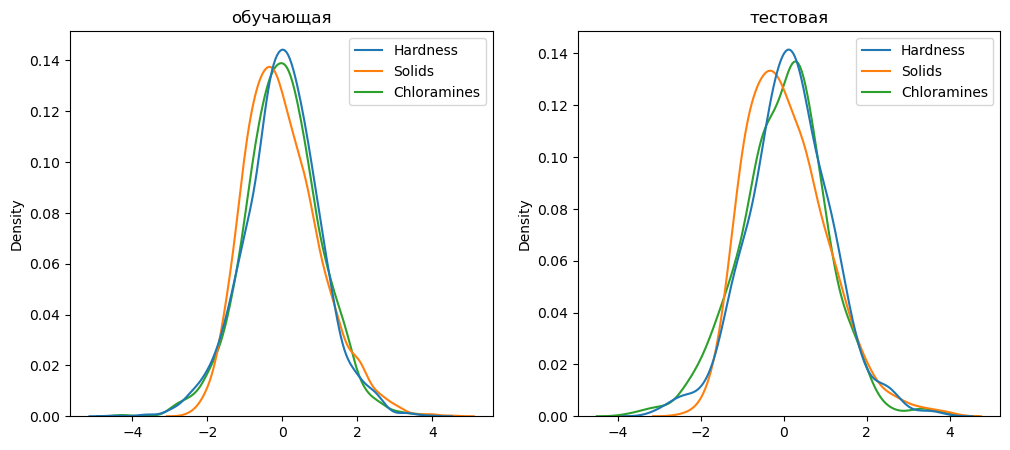

In [17]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['Hardness', 'Solids', 'Chloramines'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

#### Масштабирование "Mean Normalisation"

In [18]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [19]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(hdata)
data_cs21_scaled.describe()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,-0.000544,0.003176,0.001974,-0.000146,0.001154,-0.000728,-0.000579,0.000114
std,0.105003,0.119263,0.143968,0.124733,0.141336,0.126750,0.127939,0.147548
min,-0.505843,-0.537055,-0.354199,-0.533583,-0.426787,-0.463754,-0.533342,-0.475739
25%,-0.057438,-0.067624,-0.102242,-0.078532,-0.104590,-0.085754,-0.079758,-0.099541
50%,-0.003218,0.005346,-0.015861,0.000486,-0.006401,-0.003281,0.001165,-0.002109
75%,0.056303,0.076801,0.089299,0.078062,0.098358,0.086347,0.082651,0.100990
max,0.494157,0.462945,0.645801,0.472972,0.573213,0.536246,0.466658,0.524261


In [20]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


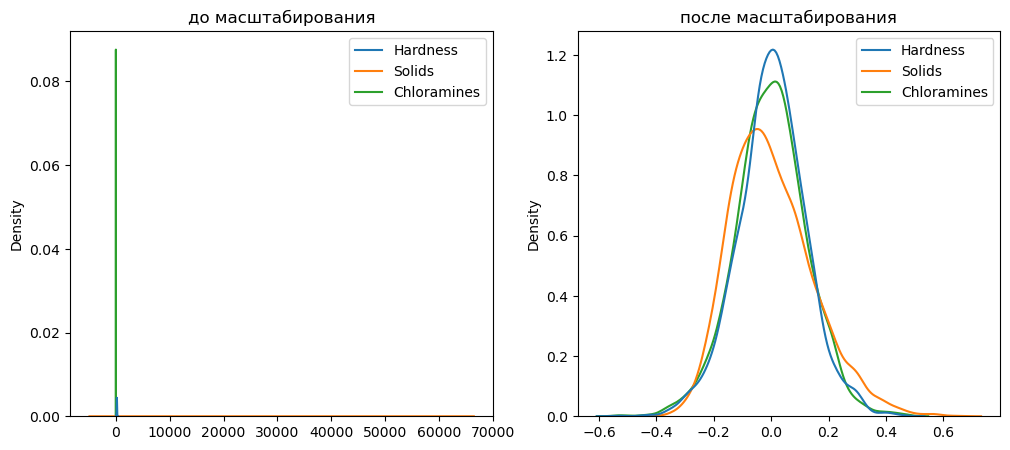

In [21]:
draw_kde(['Hardness', 'Solids', 'Chloramines'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


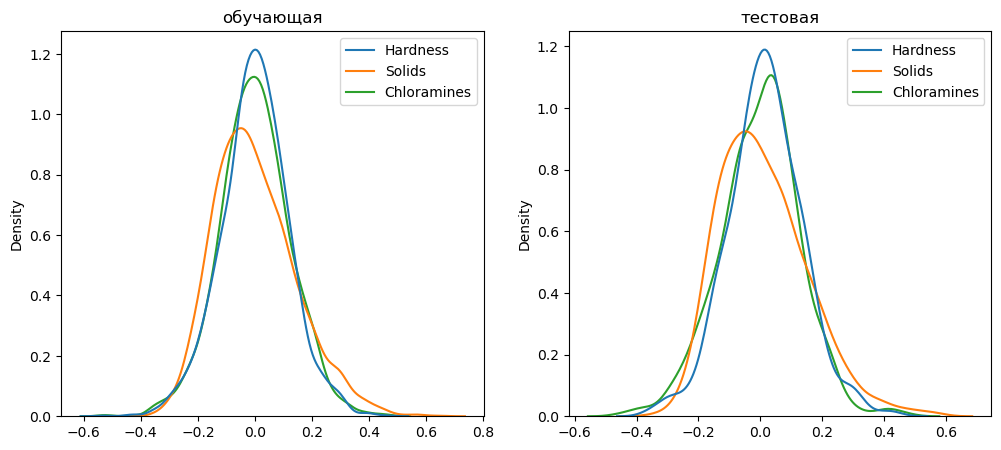

In [22]:
draw_kde(['Hardness', 'Solids', 'Chloramines'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

#### MinMax-масштабирование

In [23]:
# Обучаем MinMaxScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(hdata)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505300,0.540231,0.356173,0.529963,0.427940,0.463026,0.532763,0.475853
std,0.105003,0.119263,0.143968,0.123921,0.141336,0.126750,0.127939,0.147548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.322196,0.378000,0.453584,0.376198
50%,0.502625,0.542401,0.338338,0.530591,0.420386,0.460473,0.534508,0.473630
75%,0.562146,0.613857,0.443498,0.607662,0.525145,0.550102,0.615994,0.576729
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


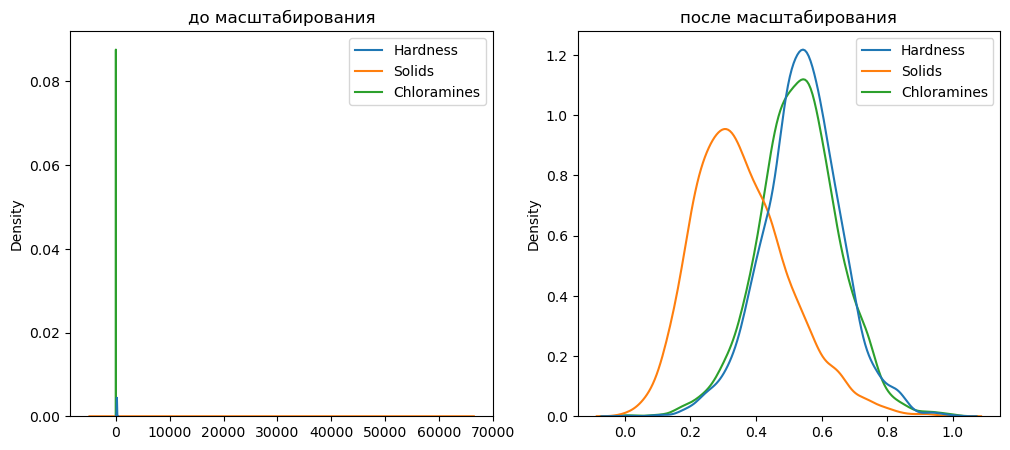

In [24]:
draw_kde(['Hardness', 'Solids', 'Chloramines'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

### ii. Обработка выбросов для числовых признаков

Замена выбросов

In [25]:
def plot_distribution_and_boxplot(data, column, hist_color='brown', hist_alpha=0.3, boxplot_palette='pastel', figsize=(10, 3)):
    fig = plt.figure(figsize=figsize)
    axes = fig.subplots(1, 2)
    # Гистограмма распределения
    sns.histplot(data[column], kde=True, color=hist_color, alpha=hist_alpha, ax=axes[0])
    axes[0].title.set_text(f"Гистограмма распределения {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Количество')
    # Диаграмма размаха
    sns.boxplot(data[column], palette=boxplot_palette, ax=axes[1])
    axes[1].title.set_text(f"Диаграмма размаха {column}")
    axes[1].set_xlabel(column)
    plt.show()

/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


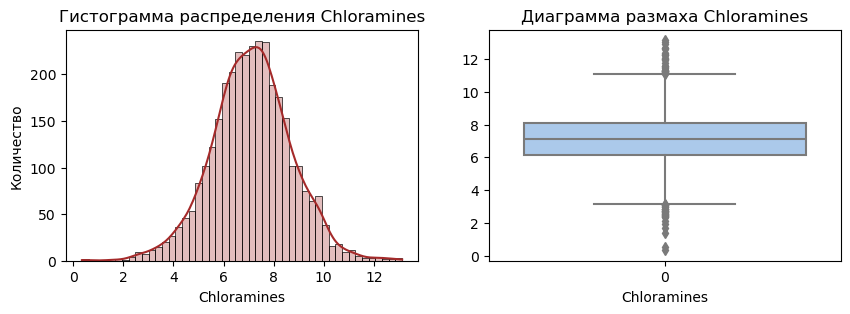

In [26]:
plot_distribution_and_boxplot(hdata, 'Chloramines')

In [27]:
K = 1.5
col = 'Chloramines'
IQR = hdata[col].quantile(0.75) - hdata[col].quantile(0.25)
lower_boundary = hdata[col].quantile(0.25) - (K * IQR)
upper_boundary = hdata[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(3.15, 11.1)

In [28]:
hdata[col] = np.where(hdata[col] > upper_boundary, upper_boundary, np.where(hdata[col] < lower_boundary, lower_boundary, hdata[col]))

/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


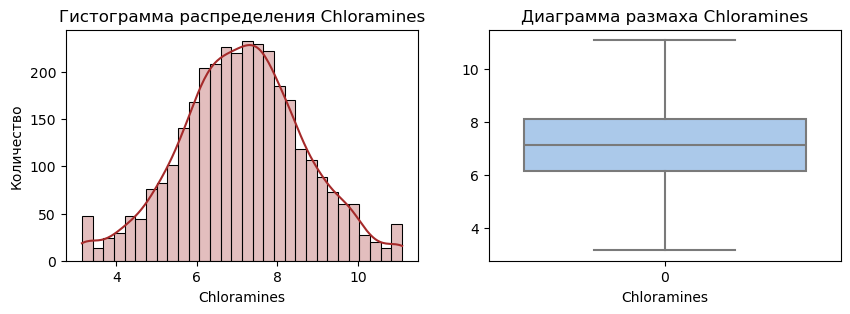

In [29]:
plot_distribution_and_boxplot(hdata, 'Chloramines')

Удаление выбросов

/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


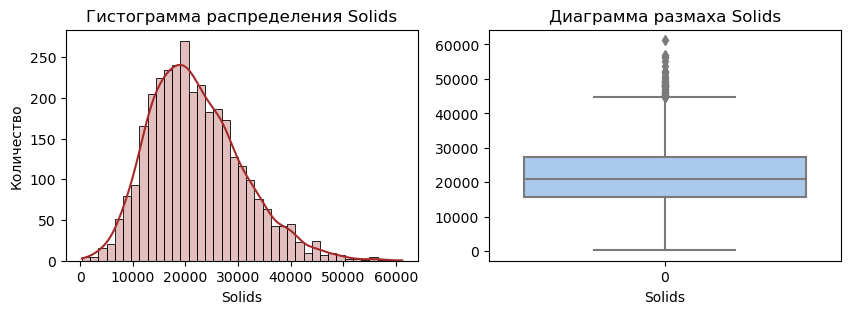

In [30]:
plot_distribution_and_boxplot(hdata, 'Solids')

In [31]:
K = 1.5
col = 'Solids'
IQR = hdata[col].quantile(0.75) - hdata[col].quantile(0.25)
lower_boundary = hdata[col].quantile(0.25) - (K * IQR)
upper_boundary = hdata[col].quantile(0.75) + (K * IQR)
round(lower_boundary, 2), round(upper_boundary, 2)

(-1832.42, 44831.87)

In [32]:
hdata = hdata[data['Solids'] < 44831.87]

/Users/evseykirichkov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


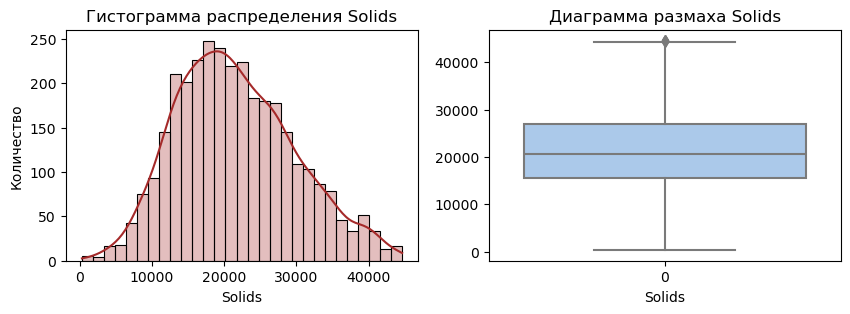

In [33]:
plot_distribution_and_boxplot(hdata, 'Solids')

#### iii. Обработка одного нестандартного признака

In [34]:
# Функция для создания текстового описания на основе показателей качества воды
def create_text_description(row):
    description = []
    if pd.notnull(row['ph']):
        if row['ph'] < 7:
            description.append('кислый')
        elif row['ph'] > 7:
            description.append('щелочной')
        else:
            description.append('нейтральный')
    if pd.notnull(row['Hardness']):
        if row['Hardness'] > 150:
            description.append('жесткая')
        else:
            description.append('мягкая')
    if pd.notnull(row['Turbidity']):
        if row['Turbidity'] > 5:
            description.append('высокая мутность')
        else:
            description.append('низкая мутность')
    
    return ' '.join(description)

In [35]:
# Применение функции для создания нового столбца с текстовыми описаниями
hdata['описание_качества'] = hdata.apply(create_text_description, axis=1)

In [36]:
hdata.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,описание_качества
0,7.036752,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,щелочной жесткая низкая мутность
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,кислый мягкая низкая мутность
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,щелочной жесткая низкая мутность
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,щелочной жесткая низкая мутность
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,щелочной жесткая низкая мутность


In [37]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(hdata['описание_качества'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
hdata_with_tfidf = pd.concat([hdata, tfidf_df], axis=1)
hdata_with_tfidf.drop(columns=['описание_качества'], inplace=True)
hdata_with_tfidf.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,высокая,жесткая,кислый,мутность,мягкая,низкая,щелочной
0,7.036752,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0.0,0.44975,0.00000,0.417126,0.000000,0.459356,0.642435
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0.0,0.00000,0.43479,0.232121,0.831706,0.255621,0.000000
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0.0,0.44975,0.00000,0.417126,0.000000,0.459356,0.642435
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0.0,0.44975,0.00000,0.417126,0.000000,0.459356,0.642435
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0.0,0.44975,0.00000,0.417126,0.000000,0.459356,0.642435


In [38]:
hdata = hdata.drop('описание_качества', axis=1)

#### iv. Отбор признаков

Filter method

In [39]:
data_loaded_2 = pd.read_csv('data/winequality-white.csv', sep=';')
data_2 = data_loaded_2

In [40]:
data_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [41]:
empty_check = data_2.isnull().any().any()
empty_check

False

In [42]:
print(f'Всего записей: {data_2.shape[0]}')
print('--------------------')
for column in data_2.columns:
    print(f'{column}: {data_2[column].value_counts().count()} уникальных значений', end='\n\n')

Всего записей: 4898
--------------------
fixed acidity: 68 уникальных значений

volatile acidity: 125 уникальных значений

citric acid: 87 уникальных значений

residual sugar: 310 уникальных значений

chlorides: 160 уникальных значений

free sulfur dioxide: 132 уникальных значений

total sulfur dioxide: 251 уникальных значений

density: 890 уникальных значений

pH: 103 уникальных значений

sulphates: 79 уникальных значений

alcohol: 103 уникальных значений

quality: 7 уникальных значений



In [43]:
data_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


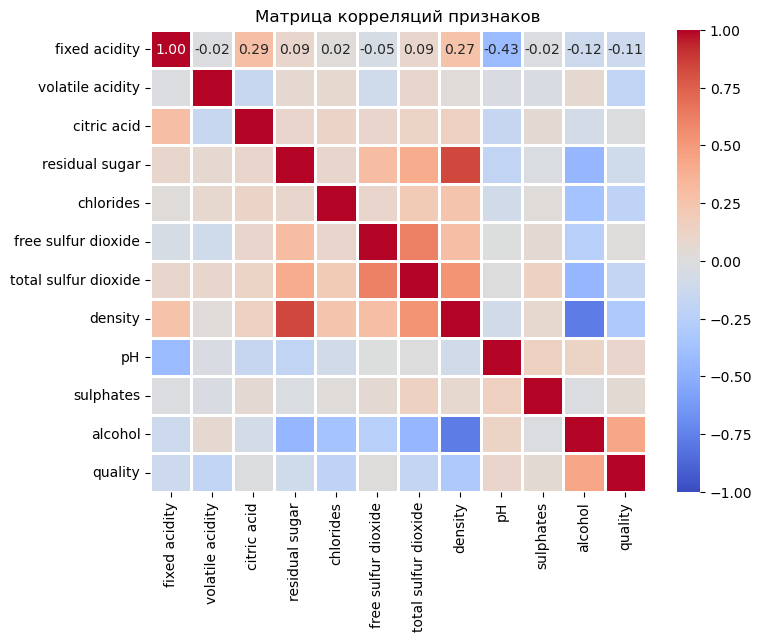

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_2.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1, annot_kws={"size": 10})
plt.title('Матрица корреляций признаков')
plt.show()

Text(0.5, 1.0, 'Корреляция признаков Качество вина')

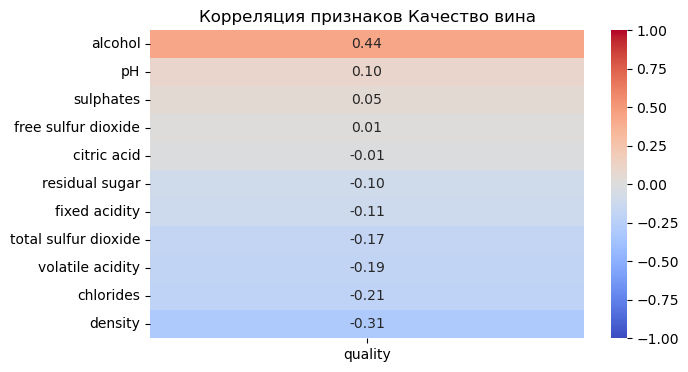

In [45]:
plt.figure(figsize=(7, 4))
sns.heatmap(pd.DataFrame(data_2.corr()['quality'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция признаков Качество вина')

In [46]:
# Функция для создания DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = df.corr()
    cr = cr.abs().unstack()
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

# Функция для обнаружения групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [47]:
# Создание DataFrame с сильными корреляциями
cr_df = make_corr_df(data_2)

# Получение групп коррелирующих признаков
correlated_feature_groups = corr_groups(cr_df)

In [48]:
correlated_feature_groups

[['residual sugar', 'density']]

Wrapper method

In [49]:
data_2.isnull().any().any()

False

In [50]:
numeric_columns = [column for column in data_2.columns if data_2.dtypes[column] != object]
numeric_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [51]:
# Подготовка матрицы признаков и вектора целевых значений
X = data_2.drop(columns='quality')
y = data_2['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Инициализация классификатора KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [53]:
# Выполнение исчерпывающего отбора признаков с конфигурацией
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train)

print('Лучшая точность: %.2f' % efs1.best_score_)
print('Лучший набор признаков (индексы):', efs1.best_idx_)
print('Лучший набор признаков (названия):', [X.columns[i] for i in efs1.best_idx_])

Features: 550/550

Лучшая точность: 0.52
Лучший набор признаков (индексы): (1, 2, 3, 10)
Лучший набор признаков (названия): ['volatile acidity', 'citric acid', 'residual sugar', 'alcohol']


Embedded method

In [54]:
# Логистическая регрессия с L1-регуляризацией
lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
lr1.fit(X_train, y_train)
sel_lr1 = SelectFromModel(lr1)
sel_lr1.fit(X_train, y_train)
selected_features_lr1 = X.columns[sel_lr1.get_support()]
print("Выбранные признаки (Логистическая регрессия):", selected_features_lr1.tolist())

Выбранные признаки (Логистическая регрессия): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [55]:
# Линейный классификатор на основе SVM с L1-регуляризацией
svc = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
svc.fit(X_train, y_train)
sel_svc = SelectFromModel(svc)
sel_svc.fit(X_train, y_train)
selected_features_svc = X.columns[sel_svc.get_support()]
print("Выбранные признаки (SVM):", selected_features_svc.tolist())

Выбранные признаки (SVM): ['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol']


In [56]:
# Линейная регрессия с Lasso
lasso = Lasso(random_state=1)
lasso.fit(X_train, y_train)
sel_lasso = SelectFromModel(lasso)
sel_lasso.fit(X_train, y_train)
selected_features_lasso = X.columns[sel_lasso.get_support()]
print("Выбранные признаки (Lasso):", selected_features_lasso.tolist())

Выбранные признаки (Lasso): ['free sulfur dioxide', 'total sulfur dioxide']
